In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency, chi2

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")
%matplotlib inline

## Общее описание:
Есть данные приложения для онлайн-знакомств. Механика приложения следующая: пользователи видят в приложении анкеты друг друга и могут ставить друг другу лайки или дизлайки. Если пользователи поставили друг другу лайк – это называется мэтч, и у пользователей появляется возможность познакомиться.

Команда приложения разработала новый алгоритм для поиска наиболее подходящих анкет. Для проверки работы алгоритма был проведен АБ-тест. Все пользователи были разделены на две группы. Пользователи в группе с номером 0 пользовались приложением со старым алгоритмом. Все пользователи в группе 1 пользовались приложением с новым алгоритмом для поиска анкет.

### План

1. **Сначала сделаем небольшой препроцессинг:**
    - Посмотрим на данные
2. **Далее сформулируем гипотезы, исходя из общей задачи:**
    - Сформулируем предположения, которые будем тестировать
    - Создадим таблицу сопряженности
3. **Тестируем гипотезы:**
     - Выбираем гипотезу
     - Выбираем подходящий тест
     - Тестируем    
4. **Подводим итоги:**
    - Сформулировать выводы и суммаризировать всё что было

In [2]:
dating_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-tsuzoj/statistics/lesson_9/dating_data.csv')

In [3]:
dating_data.head()

,user_id_1,user_id_2,group,is_match
0,79,91,1,1
1,716,353,1,1
2,423,677,0,0
3,658,165,1,1
4,969,155,0,1


In [4]:
dating_data.shape

(14514, 4)

In [5]:
dating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14514 entries, 0 to 14513
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id_1  14514 non-null  int64
 1   user_id_2  14514 non-null  int64
 2   group      14514 non-null  int64
 3   is_match   14514 non-null  int64
dtypes: int64(4)
memory usage: 453.7 KB


### Графики, гипотизы, тесты

Построим визуализацию количества мэтчей в контрольной и тестовой группах

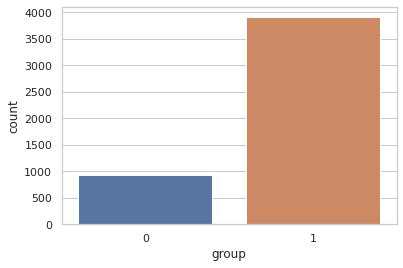

In [6]:
sns.countplot(data = dating_data.query("is_match == 1"), x = "group")

#### Судя по графику есть явный рост числа мэтчей в тестовой группе. Однако делать выводы только по графику не очень хорошо, поэтому сформулируем следующие гипотизы:

Есть две категориальные переменные → нужен хи-квадрат (также попробуем применить тест на разность пропорций и сравнить результат)

- $H_0$: процент мэтчей в группах не отличается
- $H_1$: отличия есть

In [7]:
# Создание таблицы сопряженности
cross_tab = pd.crosstab(dating_data['group'], dating_data['is_match'])
cross_tab

is_match,0,1
group,,
0,3858,934
1,5813,3909


In [8]:
# Применение теста на разность пропорций
stat, p = proportions_ztest(cross_tab[1], cross_tab.sum(axis=1))
# Вывод результатов
stat, p

(-24.89217439232899, 9.0433754456208e-137)

In [9]:
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Отклоняем H0')
else:
    print('Не отклоняем H0')

Отклоняем H0


In [10]:
# Применение теста хи-квадрат
stat, p_value, dof, expected = chi2_contingency(cross_tab)

# Вывод результатов
stat, p_value

(618.6889141576198, 1.4418299163662586e-136)

In [11]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Отклоняем H0')
else:
    print('Не отклоняем H0')

Отклоняем H0


### Вывод:

Исходя из двух проведенных статистических тестов можно сделать вывод о том, что нам следует отклонить нулевую гипотезу и принять альтернативную